# Style Transfer Inference Demo for Flowtron on Google COLAB¶ 

Original code is by:

Rafael Valle, Kevin Shih, Ryan Prenger and Bryan Catanzaro | NVIDIA

The Google Colaboratory style trasfer code was written by;

Bence Halpern | PhD Student | University of Amsterdam, TU Delft, Netherlands Cancer Institute

## Intro
This notebook requires a GPU runtime to run. Please select the menu option "**Runtime**" -> "**Change runtime type**", select "**Hardware Accelerator**" -> "**GPU**" and click "**SAVE**"

## Model Description

The TTS used in this colab is Flowtron. The original paper is:

- VALLE, Rafael, et al. Flowtron: an Autoregressive Flow-based Generative Network for Text-to-Speech Synthesis. arXiv preprint arXiv:2005.05957, 2020.

The style transfer method used is the robust reference audio-based method to perform emotional style transfer. To my knowledge, this was first done in the Tacotron 2 GST by Kwon et al. We use this method with Flowtron to get emotional audio. More detail about the reference audio-based method:

- KWON, Ohsung, et al. An Effective Style Token Weight Control Technique for End-to-End Emotional Speech Synthesis. IEEE Signal Processing Letters, 2019, 26.9: 1383-1387.

## Dataset

The happy and sad reference emotional signals are from the RAVDESS dataset. 

Please cite their work if you use the emotional data in your work:
- Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.




In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Data preparation

For your custom style transfer, you need to provide your own audio files and file lists. The easiest way you can learn how to do this is by mimicking the examples below. Upload the audio files and your file lists to your Google Drive and set it to public access.

Check that the printed downloaded size agrees with the original size. If not, you might have made a mistake in the download link or you forgot to make it public.

Don't forget to downsample your audios. You can use the bash script for that in the happy.zip. The Flowtron uses 22050 Hz and 16-bit depth.

In [2]:
import sys

# This is to make sure that the venv corresponding to the correct
# ipython kernel is used
!{sys.executable} -m pip install numpy==1.13.3 tensorflow==1.15 inflect==0.2.5 librosa==0.6.0 scipy==1.0.0 tensorboardX==1.1 Unidecode==1.0.22 pillow 

# We need to check out a certain commit here to avoid changes
!git clone https://github.com/karkirowle/flowtron.git
%cd flowtron
!git submodule init
!git submodule update
%cd tacotron2
!git submodule update --init
%cd ..


!ls
# This is ported from https://github.com/yhgon/mellotron/blob/master/inference_colab.ipynb
# This downloads the style transfer data and the trained Flowtron with vocoder
!wget -N  -q https://raw.githubusercontent.com/yhgon/colab_utils/master/gfile.py
!python gfile.py -u 'https://drive.google.com/open?id=1KhJcPawFgmfvwV7tQAOeC253rYstLrs8' -f 'flowtron_libritts.pt'
!python gfile.py -u 'https://drive.google.com/open?id=1Cjd6dK_eFz6DE0PKXKgKxrzTUqzzUDW-' -f 'flowtron_ljs.pt'

!python gfile.py -u 'https://drive.google.com/open?id=1Rm5rV5XaWWiUbIpg5385l5sh68z2bVOE' -f 'waveglow_256channels_v4.pt'



!python gfile.py -u 'https://drive.google.com/open?id=1c1gPs4sGbFMoqvM_OgvDD4k4cGkfPWUQ' -f 'happy.zip'
!python gfile.py -u 'https://drive.google.com/open?id=1LMIXuqz12PnJNBN5L2-95-jpLwoQX4_F' -f 'sad.zip'

!python gfile.py -u 'https://drive.google.com/open?id=1ncaU1lYqcDIhRwJmWtxODZDHykSYsJKt' -f 'happy_reference_audios.txt'
!python gfile.py -u 'https://drive.google.com/open?id=1JiSkb2jW8dfGELknmPhJ1-BOxlAJ6niQ' -f 'sad_reference_audios.txt'

!unzip happy.zip -d data
!unzip sad.zip -d data

!mv happy_reference_audios.txt filelists/happy_reference_audios.txt
!mv sad_reference_audios.txt filelists/sad_reference_audios.txt





     |████████████████████████████████| 17.0MB 200kB/s 
     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 1.5MB 55.5MB/s 
     |████████████████████████████████| 50.0MB 63kB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 235kB 52.3MB/s 
     |████████████████████████████████| 3.8MB 53.8MB/s 
     |████████████████████████████████| 512kB 50.2MB/s 
  Created wheel for librosa: filename=librosa-0.6.0-cp36-none-any.whl size=1553495 sha256=cc901e1cce2b675a6e4c7cb0b3ccd06d892d21d090209d845fd7fd711deeb3e9
  Stored in directory: /root/.cache/pip/wheels/0d/19/fa/71097e2207df1cc613749f15b2f0b1972c167b36d6afc09d15
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=41d13704786aab3b48ab27f54e5f1fb8edbc4800489a738631849090a7ce2b90
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699fe

In [3]:
#from unidecode import unidecode

import sys
print(sys.executable)
import os
print(os.listdir())
import matplotlib
matplotlib.use("Agg")
import matplotlib.pylab as plt

import os
import argparse
import json
import sys
import numpy as np
import torch

# Matplotlib might need to be downgraded?

import unidecode

from flowtron import Flowtron
from torch.utils.data import DataLoader
from data import Data, load_wav_to_torch
from train import update_params

sys.path.insert(0, "tacotron2")
sys.path.insert(0, "tacotron2/waveglow")
from glow import WaveGlow
from scipy.io.wavfile import write
from torch.nn import ReplicationPad1d, ReflectionPad1d
from glob import glob
from torch.distributions import Normal

import IPython
from data import DataCollate


/usr/bin/python3
['README.md', 'data', 'text', 'requirements.txt', 'sad.zip', 'flowtron.py', 'waveglow_256channels_v4.pt', 'gfile.py', '.git', 'flowtron_libritts.pt', 'train.py', 'LICENSE', 'flowtron_ljs.pt', 'apex', 'filelists', 'distributed.py', 'audio_processing.py', 'inference.py', 'flowtron_logger.py', 'data.py', 'config.json', 'flowtron_plotting_utils.py', '.gitmodules', 'happy.zip', 'tacotron2']


In [0]:
def infer(flowtron_path, waveglow_path, text, speaker_id, n_frames, sigma,
          seed,emotion,utterance=None):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

    # load waveglow
    waveglow = torch.load(waveglow_path)['model'].cuda().eval()
    waveglow.cuda().half()
    for k in waveglow.convinv:
        k.float()
    waveglow.eval()

    # load flowtron
    model = Flowtron(**model_config).cuda()
    state_dict = torch.load(flowtron_path, map_location='cpu')['state_dict']
    model.load_state_dict(state_dict)
    model.eval()
    print("Loaded checkpoint '{}')" .format(flowtron_path))

    ignore_keys = ['training_files', 'validation_files']
    trainset = Data(
        data_config['training_files'],
        **dict((k, v) for k, v in data_config.items() if k not in ignore_keys))
    speaker_vecs = trainset.get_speaker_id(speaker_id).cuda()

    styleset = Data("filelists/" + str(emotion) +"_reference_audios.txt",
                    **dict((k, v) for k, v in data_config.items() if k not in ignore_keys))

    print(len(styleset))
 # Feeding the dataset in one batch: modify if you have larger datast
    batch_size = len(styleset)

    # Sampler is assumed none for COLAB, because n_gpu=1
    style_loader = DataLoader(styleset, num_workers=1, shuffle=False,
                              sampler=None, batch_size=batch_size,
                              pin_memory=False, collate_fn=DataCollate())

    speaker_vecs = trainset.get_speaker_id(speaker_id).cuda()

    text = trainset.get_text(text).cuda()
    synth_speaker_vecs = speaker_vecs[None]
    text = text[None]


    with torch.no_grad():


        for batch in style_loader:
            mel, speaker_vecs, utt_text, in_lens, out_lens, gate_target = batch

            mel, speaker_vecs, utt_text = mel.cuda(), speaker_vecs.cuda(), utt_text.cuda()
            in_lens, out_lens, gate_target = in_lens.cuda(), out_lens.cuda(), gate_target.cuda()

            residual, _, _, _, _, _, _ = model.forward(mel, speaker_vecs, utt_text, in_lens, out_lens)
            residual = residual.permute(1, 2, 0)

        # At this stage the latent vectors are zero-padded which is not appropriate, because it violates the assumption
        # of Gaussian latent space, leading to artefacts.



        residual_accumulator = torch.zeros((residual.shape[0], 80, n_frames)).to("cuda")

        for i in range(residual.shape[0]):
            current_len = out_lens[i].cpu().numpy()

            if current_len < n_frames:
                num_tile = int(np.ceil(n_frames/current_len))
                residual_accumulator[i,:,:] = torch.repeat_interleave(residual[i,:,:current_len],repeats=num_tile,dim=1)[:,:n_frames]

        residual_accumulator = torch.mean(residual_accumulator,dim=0)[None,:,:]
       
        average_over_time = False
        if not average_over_time:
            dist = Normal(residual_accumulator, sigma)
            z_style = dist.sample()
        else:
            print(residual_accumulator.shape)
            residual_accumulator = residual_accumulator.mean(dim=2)
            dist = Normal(residual_accumulator,sigma)
            z_style = dist.sample((n_frames,)).permute(1,2,0)

        mels, attentions = model.infer(z_style, synth_speaker_vecs, text)

    for k in range(len(attentions)):
        attention = torch.cat(attentions[k]).cpu().numpy()
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))
        axes[0].imshow(mels[0].cpu().numpy(), origin='bottom', aspect='auto')
        axes[1].imshow(attention[:, 0].transpose(), origin='bottom', aspect='auto')
        fig.savefig('sid{}_sigma{}_attnlayer{}.png'.format(speaker_id, sigma, k))
        plt.close("all")

    audio = waveglow.infer(mels.half(), sigma=0.8).float()
    audio = audio.cpu().numpy()[0]
    # normalize audio for now
    audio = audio / np.abs(audio).max()
    return audio

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the original source code by accessing the object's source attribute or

Loaded checkpoint 'flowtron_ljs.pt')
Number of speakers : 1
Number of speakers : 1
24
[-1.9536020e-04  3.3394906e-05  1.5480926e-04 ...  1.4932294e-04
  1.6554333e-04 -1.4264396e-04]


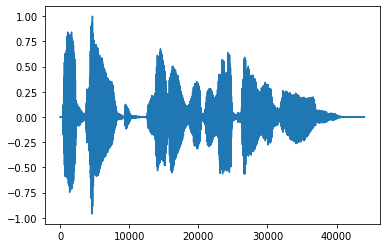

In [23]:
# Parse configs. Globals are never nice, but we use it anyway
with open("config.json") as f:
  data = f.read()

global config
config = json.loads(data)
#update_params(config, args.params)

data_config = config["data_config"]
global model_config
model_config = config["model_config"]

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

# Emotion parameter, happy and sad is implemented
emotion="happy"
#emotion="sad"

# DEFAULT SETUP: LJS
speaker_id=0

# LIBRITTS SETUP - UNCOMMENT
#data_config["training_files"] = "filelists/libritts_train_clean_100_audiopath_text_sid_shorterthan10s_atleast5min_train_filelist.txt"
#model_config["n_speakers"] = 123
#speaker_id=40 


# There are some utterances that don't work, this one is tested, feel free to
# experiment, but don't ask why it doesn't work! 
audio = infer('flowtron_ljs.pt','waveglow_256channels_v4.pt',"I don't know what is going on!", speaker_id=speaker_id,n_frames=400, sigma=0.01, seed=1)

%matplotlib inline
plt.plot(audio[:])

IPython.display.Audio(audio[:],rate=22050)